##### Github Link :  https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-klbaligala94

#### Data Description:

You are provided with a training set and a test set of images of 3 classes. Each image has a filename that is its unique id. The dataset comprises 3 classes: COVID-19, Viral Pneumonia, and Normal. The goal of the project is to create a classifier capable of determining the class of the X-ray image.

In [1]:
#!pip install opencv-python

In [2]:
#!pip install keras

In [3]:
#!pip install tensorflow

In [4]:
# Import necessary libraries.
import cv2
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop, Adam

#Notebook Output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
# Load the image files of dataset (train and test)
train_images = np.load('trainimage.npy')
test_images = np.load('testimage.npy')

# Load the labels files of dataset (train and test)
train_labels = pd.read_csv('trainLabels.csv')
test_labels = pd.read_csv('testLabels.csv')

In [6]:
#Shape of images
print(train_images.shape)
print(test_images.shape)

#Shape of label files
print(train_labels.shape)
print(test_labels.shape)


(251, 128, 128, 3)
(66, 128, 128, 3)
(251, 1)
(66, 1)


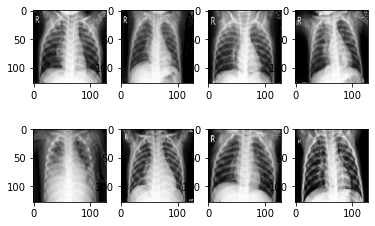

In [7]:
# Show some example train images
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(train_images[i])

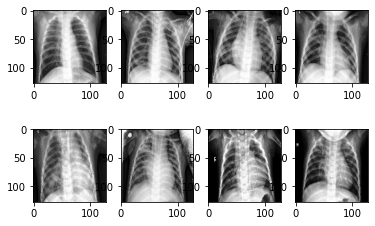

In [8]:
# Show some example test images
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(test_images[i])

### Data Exploration

In [9]:
#Frequency count of each unique level of label in the train data
train_labels.Label.value_counts()

Covid              111
Viral Pneumonia     70
Normal              70
Name: Label, dtype: int64

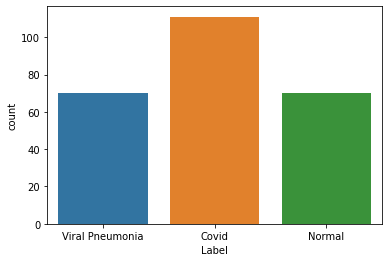

In [10]:
#Count plot of variable 'label' in the train data
sns.countplot(train_labels.Label)

In [11]:
#Frequency count of each unique level of label in the test data
test_labels.Label.value_counts()

Covid              26
Normal             20
Viral Pneumonia    20
Name: Label, dtype: int64

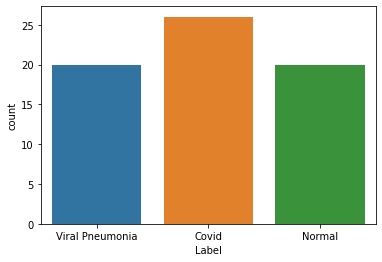

In [12]:
#Count plot of variable 'label' in the test data
sns.countplot(test_labels.Label)

In [13]:
#Number of unique labels in training data and their corresponding names
train_labels.nunique()

train_labels.Label.unique()

Label    3
dtype: int64

array(['Viral Pneumonia', 'Covid', 'Normal'], dtype=object)

### Data Pre-processing: Train Data

Gaussian Blurring

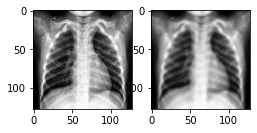

In [14]:
preprocessed_images_train = []       # Initialize empty list to store the images after pre-processing.

for img in train_images:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
     
    
    preprocessed_images_train.append(blurImg)        # Append image 
    
    # Show examples

plt.subplot(1, 3, 1); plt.imshow(img)         # Show the original image
plt.subplot(1, 3, 2); plt.imshow(blurImg)     # Blur image

preprocessed_images_train = np.asarray(preprocessed_images_train)    # Convert to numpy array.

Visualize data after Gaussian blurring

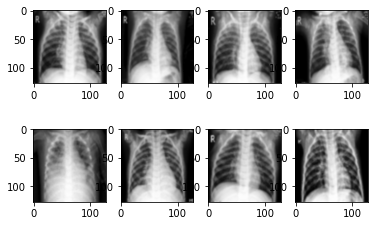

In [15]:
# Show sample result
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(preprocessed_images_train[i])

Normalization of data

In [16]:
# Normalize image data.
preprocessed_images_train = preprocessed_images_train / 255

### Data Pre-processing: Test Data

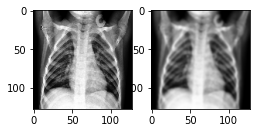

In [17]:
preprocessed_images_test = []       # Initialize empty list to store the images after pre-processing.

for img in test_images:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
     
    
    preprocessed_images_test.append(blurImg)        # Append image 
    
    # Show examples

plt.subplot(1, 3, 1); plt.imshow(img)         # Show the original image
plt.subplot(1, 3, 2); plt.imshow(blurImg)     # Blur image

preprocessed_images_test = np.asarray(preprocessed_images_test)    # Convert to numpy array.

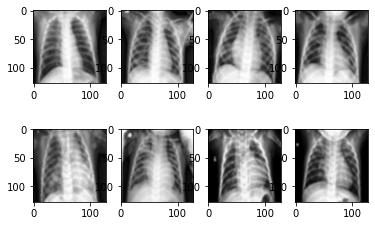

In [18]:
# Show sample result
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(preprocessed_images_test[i])

In [19]:
# Normalize image data.
preprocessed_images_test = preprocessed_images_test / 255

We have to do two separate steps for data pre-processing of both train and test data since these are given separately

### Make data compatible

- Convert labels from digits to one hot vectors.
- Check the shape of data, Reshape data into shapes compatible with Keras models, if already not compatible.


In [20]:
# Convert labels from digits to one hot vectors.
enc = LabelBinarizer()
y_train = enc.fit_transform(train_labels)
y_test  = enc.fit_transform(test_labels)

In [21]:
y_train[0]
y_test[0]

array([0, 0, 1])

array([0, 0, 1])

In [22]:
#Shape of both train and test dataset
print(preprocessed_images_train.shape)
print(y_train.shape)

print(preprocessed_images_test.shape)
print(y_test.shape)

(251, 128, 128, 3)
(251, 3)
(66, 128, 128, 3)
(66, 3)


In [23]:
# Reshape data into shapes compatible with Keras models.
preprocessed_images_train = preprocessed_images_train.reshape(preprocessed_images_train.shape[0], 128, 128, 3)
preprocessed_images_test = preprocessed_images_test.reshape(preprocessed_images_test.shape[0], 128, 128, 3)

In [24]:
print(preprocessed_images_train.shape)
print(y_train.shape)
print(preprocessed_images_test.shape)
print(y_test.shape)

(251, 128, 128, 3)
(251, 3)
(66, 128, 128, 3)
(66, 3)


From above, we can say that data was already compatible with Keras, as the shape of data before and after reshaping is same.

We are not going to create another validation dataset from the test data since number of observations from our test data is small and limited.

### Building CNNs

- Define layers.
- Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy)

In [25]:
# Set the CNN model

batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(128, 128, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [26]:
# Set the optimizer and loss function, and compile the model with them.

optimizer = Adam(
                  learning_rate=0.001,
                  beta_1=0.9,
                  beta_2=0.999,
                  epsilon=1e-07,
                  amsgrad=False,
                  name='Adam')
model.compile(optimizer = optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [27]:
# Set epochs = 10, and fit the model. 
history = model.fit(preprocessed_images_train, y_train, epochs = 10, validation_data = (preprocessed_images_test,y_test),batch_size = batch_size)

Epoch 1/10
8/8 [==============================] - 7s 889ms/step - loss: 4.8366 - accuracy: 0.3466 - val_loss: 1.1070 - val_accuracy: 0.3030
Epoch 2/10
8/8 [==============================] - 7s 864ms/step - loss: 3.4480 - accuracy: 0.4343 - val_loss: 1.1038 - val_accuracy: 0.2879
Epoch 3/10
8/8 [==============================] - 7s 857ms/step - loss: 2.0106 - accuracy: 0.5339 - val_loss: 1.0996 - val_accuracy: 0.3939
Epoch 4/10
8/8 [==============================] - 8s 980ms/step - loss: 1.4338 - accuracy: 0.6295 - val_loss: 1.1216 - val_accuracy: 0.3939
Epoch 5/10
8/8 [==============================] - 8s 958ms/step - loss: 1.0468 - accuracy: 0.6813 - val_loss: 1.1437 - val_accuracy: 0.3939
Epoch 6/10
8/8 [==============================] - 8s 949ms/step - loss: 0.7609 - accuracy: 0.7052 - val_loss: 1.2146 - val_accuracy: 0.3939
Epoch 7/10
8/8 [==============================] - 8s 946ms/step - loss: 0.4840 - accuracy: 0.8287 - val_loss: 1.3262 - val_accuracy: 0.3939
Epoch 8/10
8/8 [====

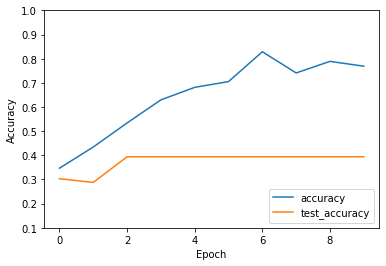

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right');

### Fit and Evaluate Model

In [33]:
# Evaluate the model.

score = model.evaluate(preprocessed_images_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.5895252227783203
Test accuracy: 0.39393940567970276


In [34]:
# Predict the values from the test dataset
Y_pred = model.predict(preprocessed_images_test)
# Convert predictions classes to one hot vectors 
result = np.argmax(Y_pred, axis=1)
# Convert test observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)

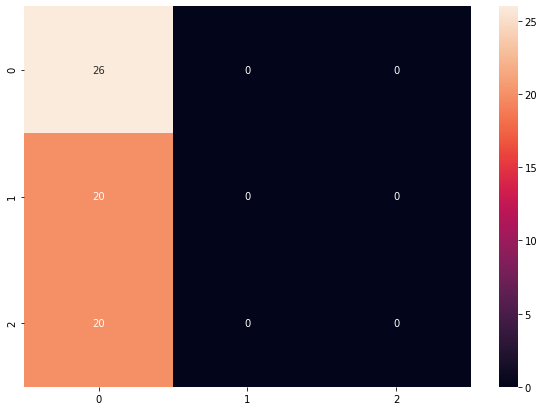

In [35]:
#Print confusion matrix
conf_mat = confusion_matrix(Y_true, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 3)],
                  columns = [i for i in range(0, 3)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

### Visualize Predictions

<Figure size 144x144 with 0 Axes>

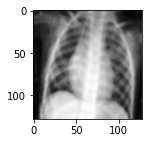

Predicted Label 0
True Label 2


<Figure size 144x144 with 0 Axes>

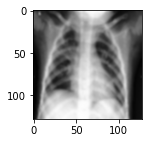

Predicted Label 0
True Label 2


<Figure size 144x144 with 0 Axes>

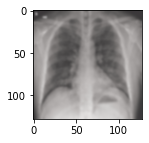

Predicted Label 0
True Label 0


<Figure size 144x144 with 0 Axes>

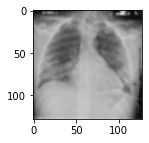

Predicted Label 0
True Label 0


<Figure size 144x144 with 0 Axes>

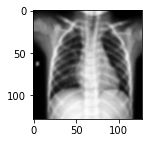

Predicted Label 0
True Label 1


In [36]:
plt.figure(figsize=(2,2))
plt.imshow(preprocessed_images_test[2],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(preprocessed_images_test[2].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[2]))

plt.figure(figsize=(2,2))
plt.imshow(preprocessed_images_test[3],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(preprocessed_images_test[3].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[3]))

plt.figure(figsize=(2,2))
plt.imshow(preprocessed_images_test[33],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(preprocessed_images_test[33].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[33]))

plt.figure(figsize=(2,2))
plt.imshow(preprocessed_images_test[36],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(preprocessed_images_test[36].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[36]))

plt.figure(figsize=(2,2))
plt.imshow(preprocessed_images_test[59],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(preprocessed_images_test[59].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[59]))

Since the model generated has lower accuracy, it is capable of predicting correctly those Xrays labeled as  0 and the rest have been classified incorrectly.